# Assignment 3: Image Filtering

MIDS W281: Computer Vision

## Recommended Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.color import rgb2gray
import skimage.io as skio

## Part 1: Convolution

![Convolution Teaser](https://raw.githubusercontent.com/W281/fileRepository/main/convolution_teaser.png)

### Overview
A Gaussian filter reduces the high frequency content and retains mostly the low frequencies. When we convolve a Gaussian filter with an image, this is called low-pass filtering. Alternatively, if we want a high-pass image, we can subtract a low-pass filtered version from the original image to get only the high frequencies.

An image often looks sharper if it has more high frequencies. We can increase the high-frequency content by adding the high-pass image to the original using a method called "unsharp mask filtering". In this part, you will create an "unsharp mask filter" that performs image sharpening. Perform your experiment on the [Taj.png](./images/taj.png) image, shown above.

### Description
1. Implement a python function to perform convolution given an image and a convolution kernel filter as inputs. The convolution kernel can be either a 2-D or 1-D kernel, and its size can vary, although it will always be an odd square for 2-D. The input image is grayscale (single channel). Do not use `scipy.ndimage.convolve` or any other equivalent function for convolution. Implement your own. Your function should return a convolved image of the same size as the input image. To handle the pixels at the edges of the image, obtain missing information by wrapping around to the opposite edge. For example, in order to compute the values in the first row, you will consider the values in the the *last* row, first row, and second row. Similarly, in order to compute the values in the first column, consider the values in the *last* column, first column, and second column.

2. Use the above convolution function to blur the Taj.png image [I] using the following Gaussian kernel [g], producing the output convolved image [I<sub>b</sub>]

 $$\begin{bmatrix} 0.0751 & 0.1238 & 0.0751 \\ 0.1238 & 0.2042 & 0.1238 \\ 0.0751 & 0.1238 & 0.0751 \end{bmatrix}$$
  &emsp;&emsp;

3. Subtract the blurred image [I<sub>b</sub>] from original image [I], to get the high frequency image: [I<sub>h</sub> = I - I<sub>b</sub>]. Then add the high frequency image [I<sub>h</sub>] back to the original [I] to get the unsharp mask image: [I<sub>s</sub> = I + I<sub>h</sub>]

4. Design a single convolution kernel [h] that will output the unsharp mask image [I<sub>s</sub>] when convolved with the original image [I]

5. Convolve the original image [I] with this kernel [h]. Let's call the output image [I'<sub>s</sub>].  

6. Compute the root mean square error (RMSE) between [I'<sub>s</sub>] and [I<sub>s</sub>].  Your error should be very close to zero (i.e. 10^-15 to 10^-16 floating point error, depending on your setup)
### Deliverables:

- Python code for convolution
- All three output images [I<sub>b</sub>, I<sub>s</sub>, I'<sub>s</sub>] and the unsharp mask convolution filter [h]
- Root mean square error between [I'<sub>s</sub>] and [I<sub>s</sub>]  ***(Use the provided, `rmse` function to calculate this)***

In [2]:
def rmse(img1, img2):
    """Calculate and return Root mean squared error"""
    return np.sqrt(np.mean(np.square(img1 - img2)))

In [3]:
# create a convolution function that takes in a grayscale image and a kernel as input
# and returns the convolved image (as a numpy array)

import numpy as np
import matplotlib.pyplot as plt

def convolution(in_im, kernel):
    """
    Perform 2D convolution of a single-channel (grayscale) image `in_im`
    with a 2D kernel `kernel`, using wrap-around at the borders.
    No external libraries (like scipy.ndimage) are used.
    """
    # Dimensions
    h, w = in_im.shape
    kh, kw = kernel.shape

    # Output image (same size as input)
    out_im = np.zeros_like(in_im, dtype=float)

    # Precompute half-sizes (assuming odd dimensions for kernel)
    pad_h = kh // 2
    pad_w = kw // 2

    # Convolution
    for row in range(h):
        for col in range(w):
            acc = 0.0
            for i in range(kh):
                # "Wrapped" row index
                rr = (row + i - pad_h) % h
                for j in range(kw):
                    # "Wrapped" col index
                    cc = (col + j - pad_w) % w
                    acc += in_im[rr, cc] * kernel[i, j]
            out_im[row, col] = acc

    return out_im


RMSE between I_s and I_sp: 1.0950816993714526e-16


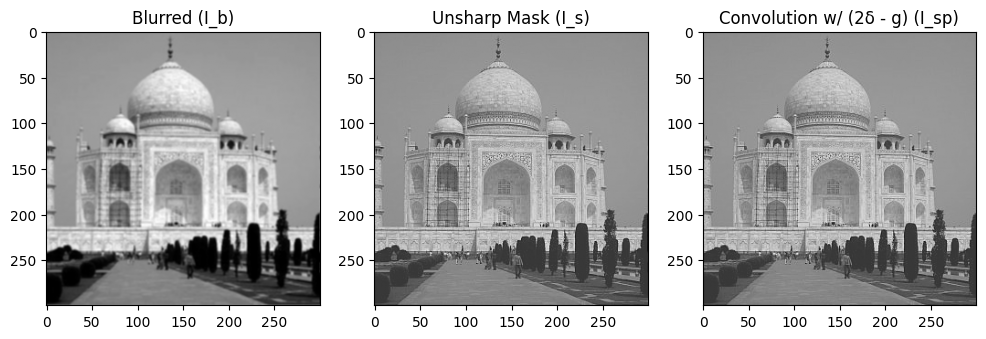

In [4]:
# use this cell (and more as needed) to implement your code and display + save the three output images:
# blurred image [I_b]
# sharpened image without convolution  [I_s]
# sharpened image with convolution [I_sp]

# 1) Read in the image (already grayscale in your example).
im_path = 'images/taj.png'
im = plt.imread(im_path).astype(float)

# 2) Define the provided Gaussian blur kernel g:
g = np.array([
    [0.0751, 0.1238, 0.0751],
    [0.1238, 0.2042, 0.1238],
    [0.0751, 0.1238, 0.0751]
])

# 3) Convolve the image with g to get the blurred image I_b:
I_b = convolution(im, g)

# 4) Get the high-frequency content I_h = I - I_b
I_h = im - I_b

# 5) Add the high-frequency content back to get the unsharp mask image: I_s = I + I_h
I_s = im + I_h  # equivalently 2*I - I_b

# 6) Construct the single kernel h that yields the same I_s if convolved once:
#    We know that I_s = 2 * delta(I) - (I convolved with g).
#    In the spatial domain, that corresponds to h = 2 * δ - g,
#    where δ is the 3×3 identity (all zeros except a 1 in the center).
delta_3x3 = np.zeros_like(g)
delta_3x3[1,1] = 1.0  # center pixel = 1
h = 2.0 * delta_3x3 - g

# 7) Convolve the original image with h, yielding I_sp
I_sp = convolution(im, h)

# 8) Compute RMSE between I_s and I_sp
error = rmse(I_s, I_sp)
print("RMSE between I_s and I_sp:", error)

# -----------------------------------------------------------------
# Displaying out I_b, I_s, and I_sp as needed.
# For example:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(I_b, cmap='gray'); plt.title("Blurred (I_b)")
plt.subplot(1,3,2); plt.imshow(I_s, cmap='gray'); plt.title("Unsharp Mask (I_s)")
plt.subplot(1,3,3); plt.imshow(I_sp, cmap='gray'); plt.title("Convolution w/ (2δ - g) (I_sp)")
plt.show()


In [5]:
# 1) Saving 3 outputs
plt.imsave('Blurred.png', I_b, cmap='gray')

plt.imsave('Unsharp_mark.png', I_s, cmap='gray')

plt.imsave('Convolution.png', I_sp, cmap='gray')

## Part 2: Deconvolution

![Deconvolution Teaser](https://raw.githubusercontent.com/W281/fileRepository/main/deconvolution_teaser.png)

### Overview
The process to reverse convolution is called deconvolution. Typically this requires some knowledge or estimate of how the convolved image was created (i.e. knowing or guessing the convolution filter). In this part you will estimate the original image from a convolved image and a known convolution filter. Because deconvolution is a memory intensive process, we will work with a 1-D kernel in this part.

### Description  

1. Start with the original image [I] and your convolution function from Part 1. First, blur the image [I] by convolving each row with the following 1-D kernel [g<sub>1</sub>] to produce a convolved image [I<sub>conv</sub>]
 $$\begin{bmatrix} 0.274 & 0.452 & 0.274 \end{bmatrix}$$  

2. Write a new python function `deconvolution` which takes in a grayscale image and a 1-D kernel and returns the original deconvolved image. For this, you will need to formulate the problem as

 $$y=Ax$$

    where $y$ is an Nx1 vector derived from a row of the input image, $A$ is an NxN matrix constructed by repeating the 1-D kernel for each pixel, and $x$ is an Nx1 vector corresponding to the unknown row of the deconvolved image. N is the total number of pixels in one row of the image.

    ***Note that this formulation is only for one row, you must compute the original intensity for each row. Make sure to handle the boundary pixels correctly when constructing A (i.e. the first and the last rows of A). Use the same wrap-around method that was used Part 1. If the boundary conditions are not handled correctly, you will get artifacts in the resulting deconvolved image.***

3. Use your deconvolution method on [I<sub>conv</sub>] and [g<sub>1</sub>] to produce the output image [I<sub>deconv</sub>]

4. Compare the original image [I] and the deconvolved image [I<sub>deconv</sub>] in terms of root mean square error (RMSE). Your error should be very close to zero (i.e. 10^-13 to 10^-14 floating point error, depending on your setup)

### Deliverables:

 - Python code for deconvolution
 - Deconvolved image [I<sub>deconv</sub>]
 - Root mean square error between [I] and [I<sub>deconv</sub>]


In [6]:
# create a deconvolution function that takes in an image and a kernel as input
# and returns the deconvolved image (as a numpy array)

def build_circulant_matrix_1d(kernel, N):
    """
    Given a 1D kernel (e.g. length=3) and row-length N,
    return the NxN circulant matrix A that implements
    a wrap-around 1D convolution by 'kernel'.

    We assume the 'center' of the kernel is kernel[k//2].
    """
    k = len(kernel)
    center = k // 2  # index of the kernel's 'center'

    # First build the "template" row c of length N, whose circulant
    # shifts form the rows of A:
    c = np.zeros(N, dtype=float)
    for i in range(k):
        # place kernel[i] at index (i - center) mod N
        c[(i - center) % N] = kernel[i]

    # Now build the circulant matrix A, where row r is just c
    # rotated so that c[0] aligns with column r.
    # Equivalently, A[r, c] = c[(c - r) mod N], or we can do a shift approach:
    A = np.zeros((N, N), dtype=float)
    for r in range(N):
        for col in range(N):
            A[r, col] = c[(col - r) % N]
    return A

def deconvolution(in_im, g1):
    """
    Deconvolve image 'in_im' which was blurred row-by-row
    with kernel 'g1'. Returns the recovered image (numpy array).

    Steps:
      1) Build NxN matrix A for row-length N (wrap-around).
      2) Invert A once.
      3) For each row, solve x = A^-1 * y, where y is that row of 'in_im'.
    """
    # in_im is HxW
    H, W = in_im.shape

    # 1) Build the circulant matrix for the kernel and invert once:
    A = build_circulant_matrix_1d(g1, W)
    A_inv = np.linalg.inv(A)

    # 2) Deconvolve each row by solving x = A_inv @ y
    out_im = np.zeros_like(in_im, dtype=float)
    for row_i in range(H):
        y = in_im[row_i, :]
        x = A_inv @ y
        out_im[row_i, :] = x

    return out_im

def convolution_1d_rows(in_im, g1):
    """
    Just for completeness: convolve each row of 'in_im'
    with 1D kernel g1 (wrap-around).
    """
    H, W = in_im.shape
    out_im = np.zeros_like(in_im, dtype=float)

    # Build circulant matrix once
    A = build_circulant_matrix_1d(g1, W)
    # Now, out_im[row] = A * in_im[row] in the sense y = Ax
    # So we can do it directly:
    for row_i in range(H):
        x = in_im[row_i,:]
        y = A @ x
        out_im[row_i,:] = y
    return out_im

RMSE between original and deconvolved: 3.44857827119508e-14


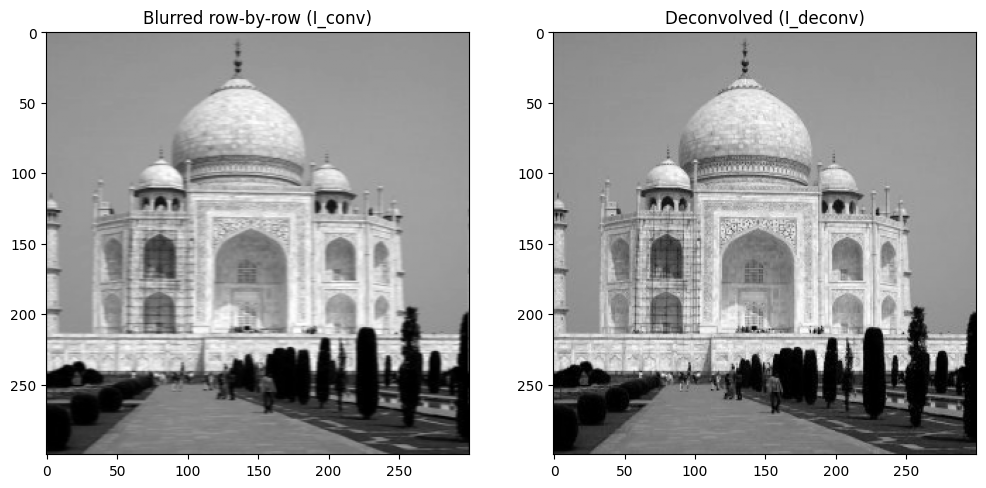

In [7]:
# use this cell (and more as needed) to implement your code and display + save the two output images:
# blurred image [I_conv]
# deconvolved image [I_deconv]
# RMSE between I and I_deconv

im_path = 'images/taj.png'
I_orig = plt.imread(im_path).astype(float)

# 1) The 1D kernel given by the assignment:
g1 = np.array([0.274, 0.452, 0.274], dtype=float)

# 2) First "blur" by convolving each row with g1 (wrap-around),
#    producing I_conv:
I_conv = convolution_1d_rows(I_orig, g1)

# 3) Now "undo" that blur via the deconvolution function:
I_deconv = deconvolution(I_conv, g1)

# 4) Compare the original I and the result I_deconv:
error = rmse(I_orig, I_deconv)
print("RMSE between original and deconvolved:", error)

# Display or save results:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(I_conv, cmap='gray')
plt.title("Blurred row-by-row (I_conv)")
plt.subplot(1,2,2)
plt.imshow(I_deconv, cmap='gray')
plt.title("Deconvolved (I_deconv)")
plt.show()

In [8]:
# 1) Save the blurred image as a PNG in grayscale:
plt.imsave('I_conv.png', I_conv, cmap='gray')

# 2) Save the deconvolved image as a PNG in grayscale:
plt.imsave('I_deconv.png', I_deconv, cmap='gray')

